# ¿Existen distintos tipos de pandemia en Chile?
uno de los temas más contingentes en el chile de hoy es el tema de la desigualdad, en esta linea, se ha podido ver como existe una gran diferencia entre el hacinamiento en distintas comunas y las condiciones de vida en estas. Ante esa idea puede surgir la interrogante del título de esta sección. para esto lo que se hará será tomar el intervalo de tiempo entre 1 de Diciembre del 2020 y 1 de marzo del 2021, donde se asume que los niveles de contagios fueron bastante estables y parecidos, de este modo, se cree que por ley de los grande números es posible describir la distribución de contagios como una gaussiana de media $\mu$ y desviación estandard $\sigma$, debido a esto es imporatante no tomar un intervalo tan grande como para que deje de existir una relación entre los contagios, ni tan pequeño como para que la distribución de estos no sea equiparable a una gaussiana. De este modo, lo que se hará será tomar para todas las comunas de Chile, los features de contagios, fallecimientos y casos activos siendo estas representadas para este intervalo de tiempo como una distribución gaussiana como se menciona anteriormente. 

In [11]:
import exploracionJO
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
from utils.dataRetrieval import get_Casos_Totales_comunas, get_total_nacional,\
get_Casos_Totales_comunas_incr
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from matplotlib.pyplot import figure

In [51]:
import numpy as np
import pandas as pd
from datetime import datetime

activos = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto19/CasosActivosPorComuna.csv",
                      delimiter=',')

activos = activos.dropna(subset=['Codigo comuna'])
activos['Codigo comuna'] = activos['Codigo comuna'].apply(int).apply(str)
indices = activos[['Codigo comuna', 'Region', 'Comuna']] 
Poblacion = activos["Poblacion"]
activos = activos.drop(['Codigo comuna', "Codigo region", "Region","Comuna","Poblacion"], axis=1)
activos = activos.div(Poblacion, axis= 0)
activos = activos.transpose()
activos.index = pd.to_datetime(list(activos.index.values))
activos = activos.loc['2020-12-01':'2021-03-01']
activos = activos.transpose()
d = {'mean_act': activos.mean(axis=1), 'std_act': activos.std(axis=1)}
activosMedidas = pd.DataFrame(data=d).join(indices)
activosMedidas = activosMedidas.set_index('Comuna')
activosMedidas.index = [value.lower() for value in list(activosMedidas.index)]
activosMedidas.drop(columns=["Codigo comuna", "Region"], inplace=True)

fallecidos = pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto38/CasosFallecidosPorComuna.csv", delimiter= ',')

fallecidos = fallecidos.dropna(subset=['Codigo comuna'])
fallecidos['Codigo comuna'] = fallecidos['Codigo comuna'].apply(int).apply(str)
indices1 = fallecidos[['Codigo comuna', 'Region', 'Comuna']] 
Poblacion = fallecidos["Poblacion"]
fallecidos2 = fallecidos
fallecidos = fallecidos.drop(['Codigo comuna', "Codigo region", "Region","Comuna","Poblacion"], axis=1)
fallecidos = fallecidos.div(Poblacion, axis=0)
fallecidos = fallecidos.transpose()
fallecidos.index = pd.to_datetime(list(fallecidos.index.values))
fallecidos = fallecidos.loc['2020-12-01':'2021-03-01']
fallecidos = fallecidos.transpose()
d1 = {'mean_fallecidos': fallecidos.mean(axis=1), 'std_fallecidos': fallecidos.std(axis=1)}
fallecidosMedidas = pd.DataFrame(data=d1).join(indices1)
fallecidosMedidas = fallecidosMedidas.set_index('Comuna')
fallecidosMedidas.index = [value.lower() for value in list(fallecidosMedidas.index)]
fallecidosMedidas.drop(columns=["Codigo comuna", "Region"], inplace=True)

In [52]:
activosMedidas

,mean_act,std_act
arica,0.001688,0.000916
camarones,0.000437,0.000697
general lagos,0.000047,0.000242
putre,0.001606,0.002105
alto hospicio,0.002302,0.000984
...,...,...
punta arenas,0.003030,0.000446
rio verde,0.001458,0.002602
san gregorio,0.002542,0.005197
timaukel,0.004910,0.010134


In [53]:
fallecidosMedidas

,mean_fallecidos,std_fallecidos
arica,0.001024,1.186622e-04
camarones,0.000905,2.642438e-04
general lagos,0.001235,2.211347e-19
putre,0.000000,0.000000e+00
alto hospicio,0.000673,1.230442e-04
...,...,...
punta arenas,0.001607,2.062352e-04
rio verde,0.000000,0.000000e+00
san gregorio,0.000000,0.000000e+00
timaukel,0.000000,0.000000e+00


In [54]:
def getMovilidadDeComunasDeRegion(start = "2020-12-01", end = "2021-03-30"):
    data_por_region = exploracionJO.get_movilidad_data_frames_por_comuna()
    df = []
    for region in range(1, 17):
        df2 = data_por_region[region - 1]
        df2.index = pd.to_datetime(list(df2.index.values))
        df2 = df2[(df2.index >= start) & (df2.index <= end)].transpose()
        df2.index = [value.lower() for value in list(df2.index)]
        
        meanTable = pd.DataFrame(df2.mean(axis = 1))
        stdTable = pd.DataFrame(df2.std(axis = 1))
        meanTable.rename(columns = {0 : 'mean_movilidad'}, inplace = True)
        stdTable.rename(columns = {0 : 'std_movilidad'}, inplace = True)

        df.append(meanTable.join(stdTable))
    df = pd.concat(df)
    return df

In [55]:
movilidadMedidas = getMovilidadDeComunasDeRegion()
for i in list(movilidadMedidas.index):
    print(i)

alto hospicio
huara
iquique
pica
pozo almonte
antofagasta
calama
maría elena
mejillones
san pedro de atacama
taltal
tocopilla
caldera
chañaral
copiapó
diego de almagro
freirina
huasco
tierra amarilla
vallenar
andacollo
canela
combarbalá
coquimbo
illapel
la higuera
la serena
los vilos
monte patria
ovalle
punitaqui
salamanca
vicuña
algarrobo
cabildo
calera
calle larga
cartagena
casablanca
catemu
concón
el quisco
el tabo
hijuelas
isla de pascua
la cruz
la ligua
limache
llaillay
los andes
nogales
olmué
panquehue
papudo
petorca
puchuncaví
putaendo
quillota
quilpué
quintero
rinconada
san antonio
san esteban
san felipe
santa maría
santo domingo
valparaíso
villa alemana
viña del mar
zapallar
chimbarongo
chépica
codegua
coinco
coltauco
doñihue
graneros
la estrella
las cabras
litueche
lolol
machalí
malloa
marchihue
mostazal
nancagua
olivar
palmilla
paredones
peralillo
peumo
pichidegua
pichilemu
placilla
quinta de tilcoco
rancagua
rengo
requínoa
san fernando
san vicente
santa cruz
cauquenes
chanc

In [56]:
activosMedidas.join(fallecidosMedidas).join(movilidadMedidas)

,mean_act,std_act,mean_fallecidos,std_fallecidos,mean_movilidad,std_movilidad
arica,0.001688,0.000916,0.001024,1.186622e-04,0.914988,0.044046
camarones,0.000437,0.000697,0.000905,2.642438e-04,NaN,NaN
general lagos,0.000047,0.000242,0.001235,2.211347e-19,NaN,NaN
putre,0.001606,0.002105,0.000000,0.000000e+00,1.128121,0.205745
alto hospicio,0.002302,0.000984,0.000673,1.230442e-04,0.837052,0.052421
...,...,...,...,...,...,...
punta arenas,0.003030,0.000446,0.001607,2.062352e-04,0.878136,0.014217
rio verde,0.001458,0.002602,0.000000,0.000000e+00,NaN,NaN
san gregorio,0.002542,0.005197,0.000000,0.000000e+00,NaN,NaN
timaukel,0.004910,0.010134,0.000000,0.000000e+00,NaN,NaN


In [58]:
def get_datos_nacionales():
    # obtenemos los contagios nacionales:
    contagios_nacionales = get_total_nacional()

    # obtenemos contagios por región:
    contagios_comuna = get_Casos_Totales_comunas_incr()
    # sacamos la columna "Tasa":
    contagios_comuna = contagios_comuna.drop('Tasa', axis=1)
    # sacamos el código de la columna y obtener casos sumados:
    connected_regions = contagios_comuna.drop(["Codigo comuna", "Codigo region"], axis=1).groupby("Region").sum()
    # obtenemos la población por region en formato de DataFrame
    # donde los indices son Región y la columna es la cantidad de población:
    # esto permite hacer divisiones por indice.
    R_population = connected_regions["Poblacion"]
    # sacamos la población y trasponemos la matriz
    connected_regions = connected_regions.drop("Poblacion", axis=1).transpose()

    # obtenemos las fechas sin los titulos 'Region', 'Codigo region', 'Comuna', 'Codigo comuna', 'Poblacion'
    Dates = list(contagios_comuna)[5:]
    return R_population, Dates

def get_densidad_contagios(Dates):
    start = "2020-12-01"
    end = "2021-03-30"
    # Procedemos a obtener los contagios por Región no incrementales:
    # generamos dataframe
    Contagios_por_dia = pd.DataFrame()
    # llenamos dataframe con fechas
    for date in Dates:
            # try to do this
            # obtenemos el data Frame de los casos totales por region en la fecha date
            df_date = get_Casos_Totales_comunas(date)
            # obtenemos las columnas
            colum_value = list(df_date.columns.values)

            # debido a la poca rigurosidad del dataset es necesario ponernos en distintos casos.
            if "Casos Confirmados" in colum_value:
                key_contagiados = "Casos Confirmados"
            # obtenemos los contagiados sin el último valor
            column_contagiados = df_date[key_contagiados].div(df_date["Poblacion"], axis=0)
            Contagios_por_dia[date] = column_contagiados
    Contagios_por_dia = Contagios_por_dia.transpose()
    Contagios_por_dia.index = pd.to_datetime(Contagios_por_dia.index)
    Contagios_por_dia = Contagios_por_dia[(Contagios_por_dia.index >= start) & (Contagios_por_dia.index <= end)].transpose()
    Contagios_por_dia.set_index(df_date["Comuna"], inplace=True)
    meanTable = pd.DataFrame(Contagios_por_dia.mean(axis = 1))
    stdTable = pd.DataFrame(Contagios_por_dia.std(axis = 1))
    meanTable.rename(columns = {0 : 'mean_contagios'}, inplace = True)
    stdTable.rename(columns = {0 : 'std_contagios'}, inplace = True)
    Contagios_final = meanTable.join(stdTable)
    Contagios_final.index = [value.lower() for value in list(Contagios_final.index)]
    return Contagios_final

In [59]:
population, dates = get_datos_nacionales()

In [60]:
contagiosMedidas = get_densidad_contagios(dates)

# Entrenamiento de algortimos de clustering: 

In [152]:
# unimos los datos para todos los features: 
X = activosMedidas.join(fallecidosMedidas).join(movilidadMedidas).join(contagiosMedidas)

In [153]:
X = X.dropna()

C:\Users\rocho\miniconda3\envs\torch_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'N de clusters mediante técnica del codo')

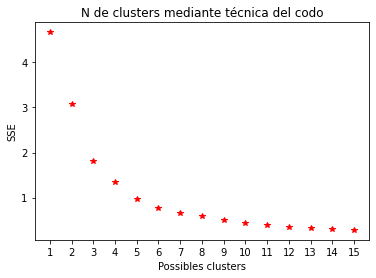

In [154]:
k_res = []
possible_k = range(1, 16)
for k in possible_k:
  k_means_alg = KMeans(n_clusters=k, random_state=100)
  k_means_alg.fit(X)
  k_res.append(k_means_alg.inertia_)

plt.plot(possible_k, k_res, "r*")
plt.xlabel("Possibles clusters")
plt.xticks(possible_k)
plt.ylabel("SSE")
plt.title("N de clusters mediante técnica del codo")

En este caso se intenta encontrar la cantidad de clusterings necesarios para poder entrenar correctamente el algortimo de kmeans. De este modo, se puede ver que dado el método del codo se pueden elegir tanto 3 o 4 clusters. A continuación se muestran los resultados de tomar 4 clusters como la cantidad óptima de clusters. 

In [158]:
# kmeans: 
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(X)
cluster, count = np.unique(kmeans.labels_, return_counts=True)
cluster_labels = [f"cluster {cluster[i]} con {count[i]} elementos" for i in range(len(cluster))]
print(cluster_labels)

['cluster 0 con 197 elementos', 'cluster 1 con 41 elementos', 'cluster 2 con 9 elementos', 'cluster 3 con 1 elementos']


In [159]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
indexes = X.index
for i in range(len(kmeans.labels_)):
    comuna = X.index[i]
    cluster = kmeans.labels_[i]
    if cluster ==0:
        cluster1.append(comuna)
    elif cluster == 1:
        cluster2.append(comuna)
    elif cluster == 2:
        cluster3.append(comuna)
    else:
        cluster4.append(comuna)
cluster1.sort()
cluster2.sort()
cluster3.sort()
cluster4.sort()

In [160]:
cluster1

['algarrobo',
 'alto hospicio',
 'ancud',
 'andacollo',
 'angol',
 'antofagasta',
 'arauco',
 'arica',
 'buin',
 'bulnes',
 'cabildo',
 'cabrero',
 'calama',
 'calbuco',
 'caldera',
 'calera',
 'calera de tango',
 'calle larga',
 'carahue',
 'cartagena',
 'casablanca',
 'castro',
 'catemu',
 'cauquenes',
 'cerrillos',
 'cerro navia',
 'chanco',
 'chiguayante',
 'chile chico',
 'chimbarongo',
 'cholchol',
 'chonchi',
 'cisnes',
 'cobquecura',
 'colina',
 'collipulli',
 'coltauco',
 'coquimbo',
 'coronel',
 'corral',
 'coyhaique',
 'cunco',
 'curanilahue',
 'curepto',
 'dalcahue',
 'diego de almagro',
 'el bosque',
 'el carmen',
 'el monte',
 'el quisco',
 'el tabo',
 'florida',
 'freire',
 'freirina',
 'frutillar',
 'futrono',
 'gorbea',
 'graneros',
 'hijuelas',
 'hualqui',
 'huasco',
 'independencia',
 'iquique',
 'isla de maipo',
 'la cisterna',
 'la cruz',
 'la estrella',
 'la florida',
 'la granja',
 'la ligua',
 'la pintana',
 'la reina',
 'la serena',
 'lago ranco',
 'laja',
 'la

In [161]:
cluster2

['antuco',
 'cabo de hornos',
 'canela',
 'cochrane',
 'codegua',
 'coinco',
 'contulmo',
 'curarrehue',
 'empedrado',
 'ercilla',
 'galvarino',
 'guaitecas',
 'huara',
 'huechuraba',
 'la higuera',
 'las condes',
 'lo barnechea',
 'lolol',
 'los lagos',
 'lumaco',
 'malloa',
 'marchihue',
 'melipeuco',
 'melipilla',
 'palena',
 'paredones',
 'pencahue',
 'perquenco',
 'pichidegua',
 'providencia',
 'puyehue',
 'rauco',
 'saavedra',
 'sagrada familia',
 'san rosendo',
 'san vicente',
 'santo domingo',
 'teodoro schmidt',
 'tierra amarilla',
 'treguaco',
 'vitacura']

In [162]:
cluster3

['coelemu',
 'coihueco',
 'fresia',
 'illapel',
 'mejillones',
 'pozo almonte',
 'punitaqui',
 'putre',
 'santa juana']

In [163]:
cluster4

['isla de pascua']

Revisando los resultados obtenidos, se puede notar casos muy interesantes y particulares en los resultados. Como ejemplo, podemos ver que las comunas más ricas de Chile se encuentran en un cluster que presenta una baja población y baja flujo de gente, como es "San rosendo", "Puyehue", "Cabo de hornos". Además, se puede ver que existe un cluster donde se encuentra solo isla de pascua y existe otro cluster donde se pueden encontrar todas las comunas que como genearlidad se sabe que la condición del covid es compleja. De este modo, se podría hacer decir que existe efectivamente otra pandemia para algunas comunas, pero, esto es dependiente claramente del algoritmo de clustering y de la fecha. Ahora, se procede a realizar el análisis de estos mismos datos con una proyección en 2D y con clustering aglomerativo.

# Proyección 2D de los datos y kmeans:

C:\Users\rocho\miniconda3\envs\torch_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'N de clusters mediante técnica del codo')

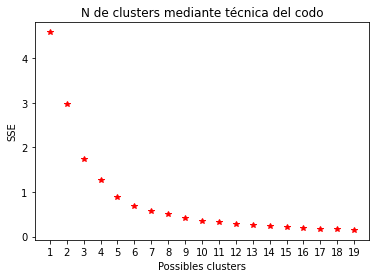

In [157]:
k_res = []
possible_k = range(1, 20)
for k in possible_k:
  k_means_alg = KMeans(n_clusters=k, random_state=100)
  k_means_alg.fit(reduced_data)
  k_res.append(k_means_alg.inertia_)

plt.plot(possible_k, k_res, "r*")
plt.xlabel("Possibles clusters")
plt.xticks(possible_k)
plt.ylabel("SSE")
plt.title("N de clusters mediante técnica del codo")

En este caso al igual que en el caso anterior, se puede notar que el óptimo está en 4 clusters y en este caso se puede ver que el efecto es más marcado que el encontrado en la parte anterior. 

['cluster 0 con 197 elementos', 'cluster 1 con 1 elementos', 'cluster 2 con 41 elementos', 'cluster 3 con 9 elementos']


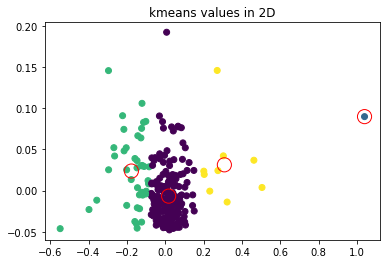

In [145]:
reduced_data = PCA(n_components=2, random_state=100).fit_transform(X)
# kmeans: 
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(reduced_data)
cluster, count = np.unique(kmeans.labels_, return_counts=True)
cluster_labels = [f"cluster {cluster[i]} con {count[i]} elementos" for i in range(len(cluster))]
print(cluster_labels)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, facecolors='none', edgecolors='r')
plt.title("kmeans values in 2D")
plt.show()

In [129]:
cluster1 = []
cluster2 = []
cluster3 = []
cluster4 = []
indexes = X.index
for i in range(len(kmeans.labels_)):
    comuna = X.index[i]
    cluster = kmeans.labels_[i]
    if cluster ==0:
        cluster1.append(comuna)
    elif cluster == 1:
        cluster2.append(comuna)
    elif cluster == 2:
        cluster3.append(comuna)
    else:
        cluster4.append(comuna)
cluster1.sort()
cluster2.sort()
cluster3.sort()
cluster4.sort()

In [130]:
cluster1.sort()
cluster1

['algarrobo',
 'alto hospicio',
 'ancud',
 'andacollo',
 'angol',
 'antofagasta',
 'arauco',
 'arica',
 'buin',
 'bulnes',
 'cabildo',
 'cabrero',
 'calama',
 'calbuco',
 'caldera',
 'calera',
 'calera de tango',
 'calle larga',
 'carahue',
 'cartagena',
 'casablanca',
 'castro',
 'catemu',
 'cauquenes',
 'cerrillos',
 'cerro navia',
 'chanco',
 'chiguayante',
 'chile chico',
 'chimbarongo',
 'cholchol',
 'chonchi',
 'cisnes',
 'cobquecura',
 'colina',
 'collipulli',
 'coltauco',
 'coquimbo',
 'coronel',
 'corral',
 'coyhaique',
 'cunco',
 'curanilahue',
 'curepto',
 'dalcahue',
 'diego de almagro',
 'el bosque',
 'el carmen',
 'el monte',
 'el quisco',
 'el tabo',
 'florida',
 'freire',
 'freirina',
 'frutillar',
 'futrono',
 'gorbea',
 'graneros',
 'hijuelas',
 'hualqui',
 'huasco',
 'independencia',
 'iquique',
 'isla de maipo',
 'la cisterna',
 'la cruz',
 'la estrella',
 'la florida',
 'la granja',
 'la ligua',
 'la pintana',
 'la reina',
 'la serena',
 'lago ranco',
 'laja',
 'la

In [131]:
cluster2

['huara',
 'tierra amarilla',
 'canela',
 'la higuera',
 'santo domingo',
 'huechuraba',
 'las condes',
 'lo barnechea',
 'melipilla',
 'providencia',
 'vitacura',
 'codegua',
 'coinco',
 'lolol',
 'malloa',
 'marchihue',
 'paredones',
 'pichidegua',
 'san vicente',
 'empedrado',
 'pencahue',
 'rauco',
 'sagrada familia',
 'treguaco',
 'antuco',
 'contulmo',
 'san rosendo',
 'curarrehue',
 'ercilla',
 'galvarino',
 'lumaco',
 'melipeuco',
 'perquenco',
 'saavedra',
 'teodoro schmidt',
 'los lagos',
 'palena',
 'puyehue',
 'cochrane',
 'guaitecas',
 'cabo de hornos']

In [132]:
cluster3.sort()
cluster3

['coelemu',
 'coihueco',
 'fresia',
 'illapel',
 'mejillones',
 'pozo almonte',
 'punitaqui',
 'putre',
 'santa juana']

In [133]:
cluster4

['isla de pascua']

# Clustering Aglomerativo

In [135]:

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

A continuación se procede a realizar un clustering aglomerativo dejando el valor del umbral de distancia como 0.8. se pueden notar 4 clusters al igual que el óptimo encontrado utilizando kmeans. 

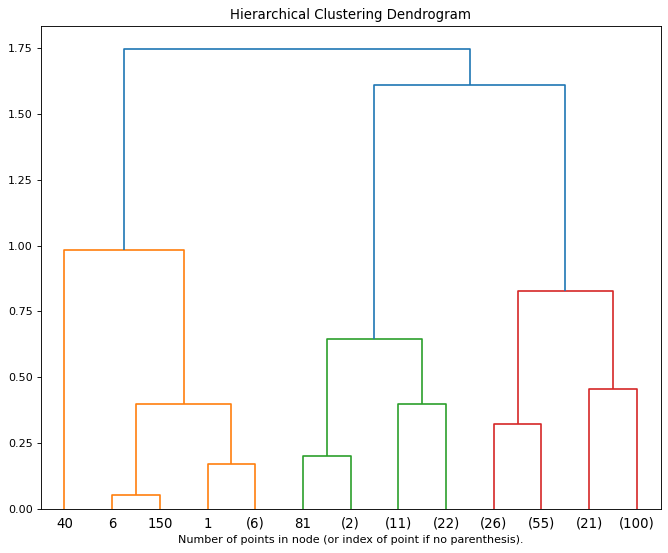

In [144]:
model = AgglomerativeClustering(distance_threshold=0.8,n_clusters=None, linkage="ward")\
                        .fit(reduced_data)

figure(figsize=(10, 8), dpi=80)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

plt.show()

In [138]:
cluster_ag1 = []
cluster_ag2 = []
cluster_ag3 = []
cluster_ag4 = []
indexes = X.index
for i in range(len(model.labels_)):
    comuna = X.index[i]
    cluster = model.labels_[i]
    if cluster ==0:
        cluster_ag1.append(comuna)
    elif cluster == 1:
        cluster_ag2.append(comuna)
    elif cluster == 2:
        cluster_ag3.append(comuna)
    else:
        cluster_ag4.append(comuna)
cluster_ag1.sort()
cluster_ag2.sort()
cluster_ag3.sort()
cluster_ag4.sort()

In [141]:
cluster_ag1

['algarrobo',
 'alto hospicio',
 'ancud',
 'andacollo',
 'angol',
 'antofagasta',
 'arauco',
 'arica',
 'buin',
 'bulnes',
 'cabildo',
 'cabrero',
 'calama',
 'calbuco',
 'caldera',
 'calera',
 'calera de tango',
 'calle larga',
 'carahue',
 'cartagena',
 'casablanca',
 'castro',
 'catemu',
 'cauquenes',
 'cerrillos',
 'cerro navia',
 'chanco',
 'chiguayante',
 'chile chico',
 'chimbarongo',
 'cholchol',
 'chonchi',
 'cisnes',
 'cobquecura',
 'codegua',
 'colina',
 'collipulli',
 'coltauco',
 'coquimbo',
 'coronel',
 'corral',
 'coyhaique',
 'cunco',
 'curanilahue',
 'curepto',
 'dalcahue',
 'diego de almagro',
 'el bosque',
 'el carmen',
 'el monte',
 'el quisco',
 'el tabo',
 'florida',
 'freire',
 'freirina',
 'frutillar',
 'futrono',
 'gorbea',
 'graneros',
 'hijuelas',
 'hualqui',
 'huasco',
 'independencia',
 'iquique',
 'isla de maipo',
 'la cisterna',
 'la cruz',
 'la estrella',
 'la florida',
 'la granja',
 'la ligua',
 'la pintana',
 'la reina',
 'la serena',
 'lago ranco',
 

In [142]:
cluster_ag2

['coelemu',
 'coihueco',
 'fresia',
 'illapel',
 'mejillones',
 'pozo almonte',
 'punitaqui',
 'putre',
 'santa juana']

In [106]:
cluster_ag3

['antuco',
 'cabo de hornos',
 'canela',
 'cochrane',
 'coinco',
 'contulmo',
 'curarrehue',
 'empedrado',
 'ercilla',
 'galvarino',
 'guaitecas',
 'huara',
 'huechuraba',
 'la higuera',
 'las condes',
 'lo barnechea',
 'los lagos',
 'lumaco',
 'malloa',
 'marchihue',
 'melipeuco',
 'melipilla',
 'palena',
 'paredones',
 'pencahue',
 'perquenco',
 'providencia',
 'puyehue',
 'rauco',
 'saavedra',
 'san vicente',
 'santo domingo',
 'teodoro schmidt',
 'tierra amarilla',
 'treguaco',
 'vitacura']

In [107]:
cluster4

['isla de pascua']

# Clustering Aglomerativo con datos proyectados en 2D:

['cluster 0 con 202 elementos', 'cluster 1 con 9 elementos', 'cluster 2 con 36 elementos', 'cluster 3 con 1 elementos']


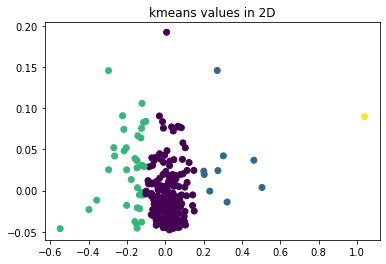

In [149]:
reduced_data = PCA(n_components=2, random_state=100).fit_transform(X)
# kmeans: 
model = AgglomerativeClustering(distance_threshold=0.9,n_clusters=None, linkage="ward")\
                        .fit(reduced_data)
cluster, count = np.unique(model.labels_, return_counts=True)
cluster_labels = [f"cluster {cluster[i]} con {count[i]} elementos" for i in range(len(cluster))]
print(cluster_labels)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=model.labels_)
plt.title("kmeans values in 2D")
plt.show()

In [164]:
cluster_ag1 = []
cluster_ag2 = []
cluster_ag3 = []
cluster_ag4 = []
indexes = X.index
for i in range(len(model.labels_)):
    comuna = X.index[i]
    cluster = model.labels_[i]
    if cluster ==0:
        cluster_ag1.append(comuna)
    elif cluster == 1:
        cluster_ag2.append(comuna)
    elif cluster == 2:
        cluster_ag3.append(comuna)
    else:
        cluster_ag4.append(comuna)
cluster_ag1.sort()
cluster_ag2.sort()
cluster_ag3.sort()
cluster_ag4.sort()

In [165]:
cluster_ag1

In [ ]:
cluster_ag2

In [ ]:
cluster_ag3

In [ ]:
cluster_ag4

# Conclusiones: 
Se puede notar en estos casos que los resultados encontrados tanto en los resultados de kmeans como de los algoritmos de clustering aglomerativo. En estos resultados se puede encontrar el hecho de que las comunas más ricas de Chile, se encuentran en un cluster que contiene comunas pequeñas, de región y de poco flujo. Esto se cree que muestra la desigualdad existente en estas comunas en comparación al resto del país, pero es necesario considerar algo ante esta conjetura, el instante de tiempo puede ser efectivamente un condicionante fuerte, esto ya que en general la gente de estas comunas se va de vacaciones a regiones y no están en estas durante el verano. En esta linea se hace necesario realizar un análisis de distintos intervalos de tiempo y revisar si estas tendencias se mantienen, para poder ser categórico con el resultado. Por último, es posible ver en todos los casos a isla de pascua sola en un cluster mostrando la solución diferente que existe en esta parte del país donde hay una pandemia en libertad, que es una situación completamente diferente a Chile continental. 